In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import datetime

In [2]:
# Step 2: Load and clean the data safely
df = pd.read_csv("input_dataset(in).csv", low_memory=False, dtype=str)
df.columns = df.columns.str.strip()

# Convert columns to appropriate types
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

# Drop rows with missing values (optional)
df.dropna(subset=['date', 'quantity', 'revenue'], inplace=True)


In [3]:
# Step 3: Define product_df
product_df = df[df['product'] == 'pizza'].copy()
product_df['date_ordinal'] = product_df['date'].map(datetime.datetime.toordinal)

In [4]:
# Step 4: Prepare features and target
X = product_df[['date_ordinal']]
y = product_df['quantity']

In [5]:
# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Step 6: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Step 7: Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 374557.17692975345


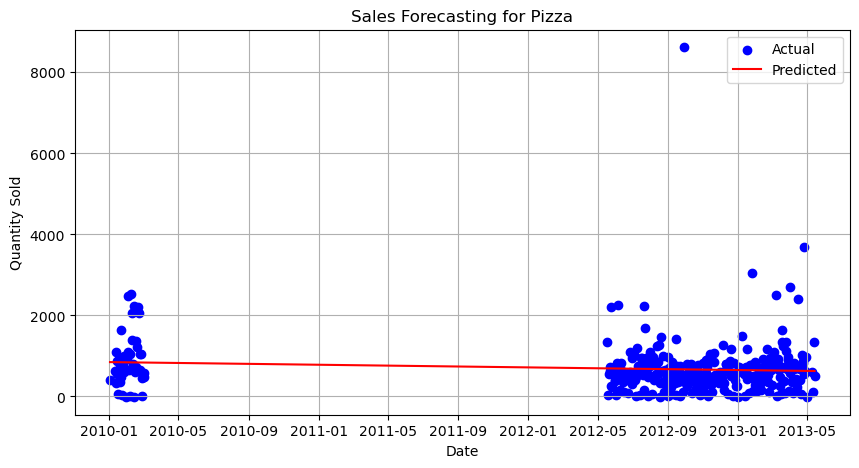

In [8]:
# Step 8: Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.scatter(product_df['date'], product_df['quantity'], label='Actual', color='blue')
plt.plot(product_df['date'], model.predict(product_df[['date_ordinal']]), label='Predicted', color='red')
plt.title('Sales Forecasting for Pizza')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.grid(True)
plt.show()